In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [109]:
df = pd.read_csv('../input/insurance/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
data = df.iloc[:,:-1]
target = df.charges

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [112]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

<AxesSubplot:>

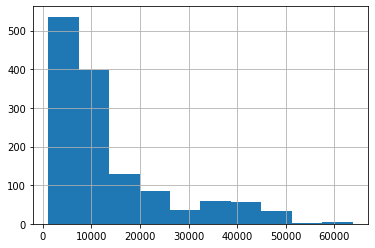

In [113]:
target.hist()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=2022)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [116]:
cols = X_train.select_dtypes('object').columns
cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [117]:
X_train = pd.get_dummies(X_train, columns = cols)
X_test = pd.get_dummies(X_test, columns = cols)

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['bmi'] = scaler.fit_transform(X_train[['bmi']])
X_test['bmi'] = scaler.transform(X_test[['bmi']])

In [119]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,0.786328,0,0,1,1,0,0,1,0,0
737,26,-1.150810,2,0,1,1,0,0,0,0,1
539,53,0.101862,0,0,1,1,0,0,0,1,0
357,47,-0.147035,3,0,1,1,0,0,1,0,0
531,62,0.164086,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
240,23,0.973001,2,1,0,0,1,1,0,0,0
624,59,-0.318152,0,0,1,1,0,0,1,0,0
173,35,0.666792,1,1,0,1,0,0,0,0,1
1244,18,0.426083,0,0,1,1,0,0,0,1,0


In [120]:
# 나이를 10대, 20대, 30대로 구분하기 위해 10을 나눈 몫 값만 구함
X_train['age'] = X_train['age'].apply(lambda x: x//10)
X_test['age'] = X_test['age'].apply(lambda x: x//10)

In [121]:
X_train.head(3)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,1,0.786328,0,0,1,1,0,0,1,0,0
737,2,-1.150810,2,0,1,1,0,0,0,0,1
539,5,0.101862,0,0,1,1,0,0,0,1,0


In [122]:
y_train = np.log1p(y_train)

In [123]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                           test_size=0.15,
                                           random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((909, 11), (161, 11), (909,), (161,))

In [124]:
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

In [125]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred): 
    return np.sqrt(np.mean((y_true-y_pred)**2))

rmse(y_val, pred)

0.5728524651628969

In [126]:
def rmse2(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse2(y_val, pred)

0.5728524651628969

In [127]:
pred = np.exp(pred)

In [128]:
output = pd.DataFrame({'pred':pred})

In [129]:
output.head()

,pred
0,2550.728248
1,19268.608554
2,42956.510022
3,4220.182735
4,10381.262609


In [130]:
output.to_csv('1234567.csv', index=False)